In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Utils
## Data Import

In [2]:
def readData(name):
    filename_data = "TCGA-"+name+"-Data.csv"
    filename_meta_data = "TCGA-"+name+"-MetaData.csv"
    
    df = pd.DataFrame()
    for chunk in pd.read_csv("../data/subsets/"+filename_data, chunksize=10**3):
        df = pd.concat([df, chunk], ignore_index=True)

    data = df.values

    df = pd.DataFrame()
    for chunk in pd.read_csv("../data/subsets/"+filename_meta_data, chunksize=10**3):
        df = pd.concat([df, chunk], ignore_index=True)

    meta_data = df.values
    
    return data,meta_data

def getColor(index):
    colors = ["blue","red","green","yellow","orange"]
    
    return colors[index%len(colors)]

def getData(types):
    combined_data = combined_meta_data = labels = colors = []
    for index, cancer_type in enumerate(types):
        data, meta_data = readData(cancer_type)
        if index == 0:
            combined_data = data[:,1:]
            combined_meta_data = meta_data
            labels = [index]*data.shape[0]
            colors = [getColor(index)]*data.shape[0]
        else:
            combined_data = np.concatenate((combined_data,data[:,1:]),axis=0)
            combined_meta_data = np.concatenate((combined_meta_data,meta_data),axis=1)
            labels = np.concatenate((labels,[index]*data.shape[0]),axis=0)
            colors = np.concatenate((colors,[getColor(index)]*data.shape[0]),axis=0)
        
    combined_meta_data = np.transpose(combined_meta_data)
    labels = np.transpose(labels)
    colors = np.transpose(colors)
    
    return combined_data, combined_meta_data, labels, colors

In [3]:
data, metaData, labels, colors = getData(["GBM","PAAD","LAML"])

In [4]:
data.shape

(484, 55541)

# PCA Transform

In [14]:
pca = PCA(n_components=3, svd_solver='full')
pca.fit(data)
X = pca.transform(data)

MemoryError: 

In [7]:
pca.explained_variance_ratio_

array([ 0.49362051,  0.04229654,  0.03692534])

# Feature Selection

In [5]:
X = SelectKBest(chi2, k=3).fit_transform(data,labels)
X.shape

(484, 3)

In [12]:
selector = SelectKBest(chi2, k=3)
selector.fit(data,labels)
indices = selector.get_support(indices=True)
X = data[:,indices]
indices

array([ 6394, 13020, 41711], dtype=int32)

# Plotting

<IPython.core.display.Javascript object>


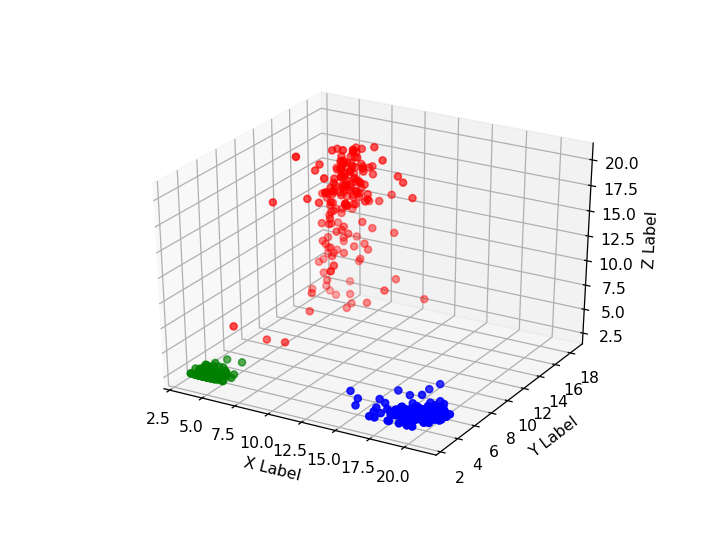

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:,0]
y = X[:,1]
z = X[:,2]

ax.scatter(x,y,z, c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()